In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [234]:
# filepath = '/Users/thomas/Downloads/datasheet.csv'
# df = pd.read_csv(filepath, decimal=',')

# df['T1'] = 1/(df.temp + 273)
# df['log'] = np.log(df.impedance)
# df['log3'] = np.log(df.impedance)**3

# # Predict 1/T with a linear regression
# mod = smf.ols(formula='T1 ~ log + log3', data=df)
# np.random.seed(2) 
# res = mod.fit()

# # S-S equation
# def temp(R_T):
#     A, B, C = res.params.Intercept, res.params.log, res.params.log3
#     return round(1 / (A + B*np.log(R_T) + C*np.log(R_T)**3) - 273,2)

# df['temp_pred'] = df.impedance.apply(temp)
# df.drop(columns=['T1','log','log3'], inplace=True)
# df.head()

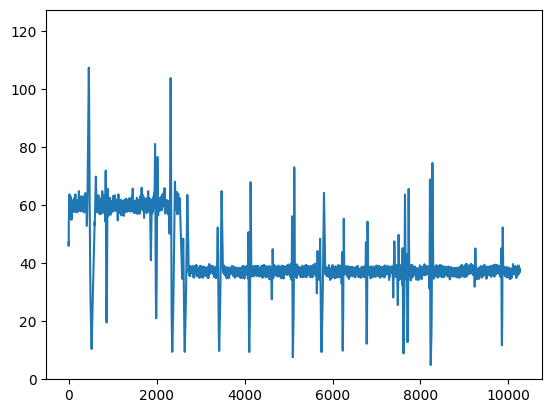

In [235]:
filepath = '/Users/thomas/Desktop/wip/store-flow_frequency.1725385021.csv'
df = pd.read_csv(filepath, names=['time','freq'])
plt.ylim([0,max(df.freq)+20])
plt.plot(df.freq)

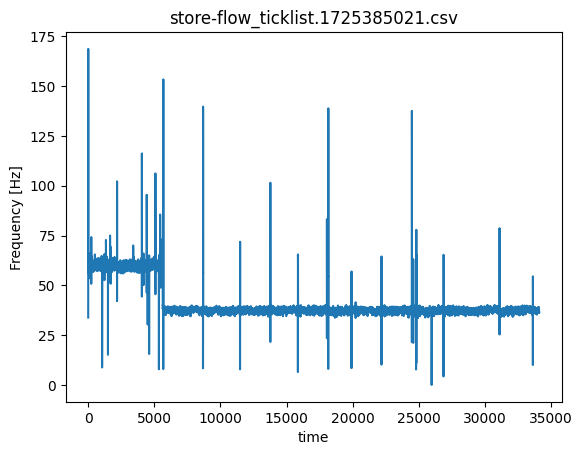

In [236]:
filepath = '/Users/thomas/Desktop/wip/store-flow_ticklist.1725385021.csv'
df = pd.read_csv(filepath, names=['start_delta_ms', 'timestamp_s', 'tick_delta_micro'])
df['frequency'] = 1/df['tick_delta_micro'] * 1e6
df = df[df.frequency < 200]
plt.xlabel('time')
plt.ylabel('Frequency [Hz]')
plt.title(filepath.split('/')[-1])
plt.plot(df.frequency)

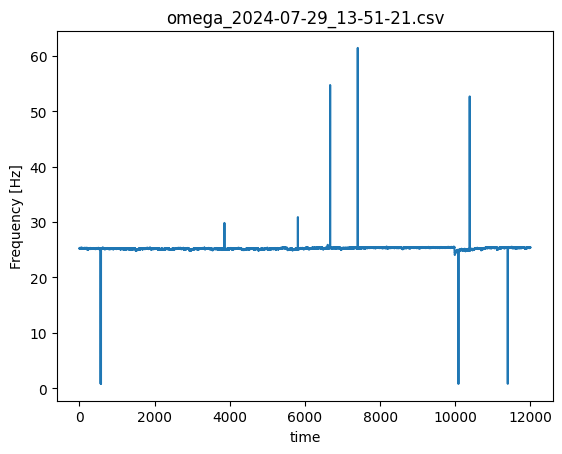

In [237]:
filepath = '/Users/thomas/Desktop/wip/omega_2024-07-29_13-51-21.csv'
df = pd.read_csv(filepath, names=['pi','time'])

ns_timestamps = list(df.time)
ns_tick_delta = [y-x for x,y in zip(ns_timestamps[:-1],ns_timestamps[1:])]
ns_tick_delta = ns_tick_delta + [ns_tick_delta[-1]]
ms_tick_delta = [x/1e6 for x in ns_tick_delta] # ms
frequency = [(1/x)*1e12 for x in ns_tick_delta] # Hz    

frequency = [x for x in frequency if x<100]


plt.plot(frequency[1000:13000])
plt.xlabel('time')
plt.ylabel('Frequency [Hz]')
plt.title(filepath.split('/')[-1])
plt.show()

# df['frequency'] = 1/df['tick_delta_micro'] * 1e6
# df = df[df.frequency < 200]

# plt.plot(df.frequency)